In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [2]:
np.random.seed(0)

In [3]:
N = 100
mu = 0.2
sigma = 1
x = np.random.randn(N)*sigma + mu

In [4]:
x

array([ 1.96405235,  0.60015721,  1.17873798,  2.4408932 ,  2.06755799,
       -0.77727788,  1.15008842,  0.04864279,  0.09678115,  0.6105985 ,
        0.34404357,  1.65427351,  0.96103773,  0.32167502,  0.64386323,
        0.53367433,  1.69407907, -0.00515826,  0.5130677 , -0.65409574,
       -2.35298982,  0.8536186 ,  1.0644362 , -0.54216502,  2.46975462,
       -1.25436567,  0.24575852,  0.01281615,  1.73277921,  1.66935877,
        0.35494743,  0.57816252, -0.68778575, -1.78079647, -0.14791215,
        0.35634897,  1.43029068,  1.40237985, -0.18732682, -0.10230275,
       -0.84855297, -1.22001794, -1.50627019,  2.1507754 , -0.30965218,
       -0.2380743 , -1.05279536,  0.97749036, -1.41389785, -0.01274028,
       -0.69546656,  0.5869025 , -0.31080514, -0.98063218,  0.17181777,
        0.62833187,  0.26651722,  0.5024719 , -0.43432209, -0.16274117,
       -0.47246045, -0.15955316, -0.61314628, -1.5262826 ,  0.37742614,
       -0.20178094, -1.43019835,  0.66278226, -0.70729836,  0.25

In [5]:
# two-sided test
ztest(x)

(2.5648404153513686, 0.010322326848815837)

In [6]:
# two-sided test
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat / (sigma_hat / np.sqrt(N)) # our mu0 = 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(2.564840415351368, 0.010322326848815901)

In [7]:
### Alternate calculation
mu_hat = x.mean()
v_hat = x.var(ddof=1) / N
z = mu_hat / np.sqrt(v_hat) # our mu0 = 0
p = 2 * norm.sf(np.abs(z))
z, p

(2.5648404153513686, 0.010322326848815837)

In [8]:
# one-side test
ztest(x, alternative="larger")

(2.5648404153513686, 0.005161163424407918)

In [9]:
# one-sided test
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat / (sigma_hat / np.sqrt(N)) # our mu0 = 0
p = 1 - norm.cdf(z)
z, p

(2.564840415351368, 0.005161163424407977)

In [10]:
# null under a different reference value
mu0 = 0.2
ztest(x, value=mu0)

(0.5904283402851699, 0.5549035151647227)

In [11]:
# null under a different reference value
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = (mu_hat - mu0) / (sigma_hat / np.sqrt(N))
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(0.5904283402851698, 0.5549035151647228)

In [12]:
# tw-sample test
N0 = 100
mu0 = 0.2
sigma0 = 1
x0 = np.random.randn(N0) * sigma0 + mu0

N1 = 100
mu1 = 0.5
sigma1 = 1
x1 = np.random.randn(N1) * sigma1 + mu1

In [13]:
ztest(x0, x1)

(-1.1234612344369315, 0.2612416557056353)

In [14]:
# two-sample test implementation
mu_hat0 = x0.mean()
mu_hat1 = x1.mean()



print(mu_hat0)
print(mu_hat1)


dmu_hat = mu_hat1 - mu_hat0

s2_hat0 = x0.var(ddof=1)
s2_hat1 = x1.var(ddof=1)

s_hat = np.sqrt(s2_hat0 / N0 + s2_hat1 / N1)


z = dmu_hat / s_hat

p_right = 1 - norm.cdf(np.abs(z))

p_left = norm.cdf(-np.abs(z))


p = p_right + p_left

z, p

0.2820129707478374
0.440767739440337


(1.1234612344369315, 0.26124165570563523)

In [15]:
# show that we will reject the null hypothesis when the
# null hypothesis is true (false alarm) 5% of the time
num_tests = 10000
results = np.zeros(num_tests)
for i in range(num_tests):
  x1 = np.random.randn(100)
  x2 = np.random.randn(100)
  z, p = ztest(x1, x2)
  results[i] = (p < 0.05)
print(results.mean())

0.049


# Real example

In [16]:
import requests

url = 'https://lazyprogrammer.me/course_files/titanic_train.csv'
response = requests.get(url)

with open('datasets/titanic_train.csv', 'wb') as file:
    file.write(response.content)

print("Download complete")

Download complete


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('datasets/titanic_train.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df[df["Survived"] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
x1 = df[df["Survived"] == 1]["Fare"].dropna().to_numpy()

In [22]:
x1

array([ 71.2833,   7.925 ,  53.1   ,  11.1333,  30.0708,  16.7   ,
        26.55  ,  16.    ,  13.    ,   7.225 ,  13.    ,   8.0292,
        35.5   ,  31.3875,   7.8792, 146.5208,   7.75  ,   7.2292,
        11.2417,  41.5792,   7.8792,   7.75  ,  76.7292,  26.    ,
        35.5   ,  10.5   ,  27.75  ,  80.    ,  15.2458,  10.5   ,
         7.925 ,  56.4958,  29.    ,  12.475 ,   9.5   ,   7.7875,
        10.5   ,  15.85  , 263.    ,  63.3583,  23.    ,   7.65  ,
         7.775 ,  24.15  ,  13.    ,  11.2417,   7.1417,  22.3583,
        26.    ,  26.2833,   7.75  ,  15.85  ,   7.7958,  66.6   ,
         7.7333,  15.75  ,  20.525 ,  55.    ,  11.1333,  39.    ,
        22.025 ,  15.5   ,  26.55  ,  13.    ,   7.8542,  26.    ,
        27.7208, 146.5208,   7.75  ,   8.05  ,  18.7875,   7.75  ,
        31.    ,  21.    , 113.275 ,   7.925 ,  76.2917,   8.05  ,
        90.    ,  10.5   ,  83.475 ,  31.3875,  26.25  ,  15.5   ,
        14.5   ,  52.5542,  15.2458,  79.2   ,  86.5   , 512.3

In [23]:
x2 = df[df["Survived"] == 0]["Fare"].dropna().to_numpy()

In [24]:
x2

array([  7.25  ,   8.05  ,   8.4583,  51.8625,  21.075 ,   8.05  ,
        31.275 ,   7.8542,  29.125 ,  18.    ,  26.    ,  21.075 ,
         7.225 , 263.    ,   7.8958,  27.7208,  10.5   ,  82.1708,
        52.    ,   8.05  ,  18.    ,   9.475 ,  21.    ,   7.8958,
         8.05  ,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        61.9792,   7.2292,  46.9   ,   7.2292,  83.475 ,  27.9   ,
        27.7208,   8.1583,   8.6625,  10.5   ,  46.9   ,  73.5   ,
        14.4542,   7.65  ,   7.8958,   8.05  ,   9.    ,  47.1   ,
        34.375 ,   8.05  ,   8.05  ,   8.05  ,   7.8542,  61.175 ,
        20.575 ,   7.25  ,   8.05  ,  34.6542,  26.    ,   7.8958,
         7.8958,  77.2875,   8.6542,   7.925 ,   7.8958,   7.8958,
        52.    ,  14.4542,   8.05  ,   9.825 ,  14.4583,   7.925 ,
         7.75  ,  21.    , 247.5208,  31.275 ,  73.5   ,   8.05  ,
        30.0708,  77.2875,   7.75  ,   6.975 ,   7.8958,   7.05  ,
        14.5   ,  13.    ,  15.0458,  53.1   ,   9.2167,  79.2

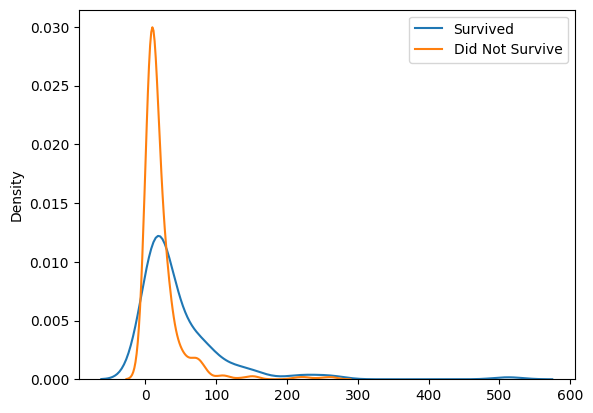

In [26]:
sns.kdeplot(x1,  label="Survived")
sns.kdeplot(x2,  label="Did Not Survive")
plt.legend()

In [27]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

In [31]:
z, p = ztest(x1, x2, usevar="unequal")

In [32]:
z

6.839099259085254

In [34]:
formatted_p = f"{p:.15f}"
print(formatted_p)

0.000000000007969


In [35]:
# Verify with above code
# two-sample test implementation
N0 = len(x1)
N1 = len(x2)
mu_hat0 = x1.mean()
mu_hat1 = x2.mean()
dmu_hat = mu_hat1 - mu_hat0
s2_hat0 = x1.var(ddof=1)
s2_hat1 = x2.var(ddof=1)
s_hat = np.sqrt(s2_hat0 / N0 + s2_hat1 / N1)
z = dmu_hat / s_hat # reference value is 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(-6.839099259085254, 7.969223252618599e-12)

In [37]:
formatted_p = f"{p:.15f}"
print(formatted_p)

0.000000000007969
